In [3]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

In [1]:
J1=9.39 #Это первая энергия ионизации, поменять на свою
J2=17.96 #Это вторая энергия ионизации, поменять на свою
P=100.
T0=300
k=1.38*1e-23
n0=3.3*1e18 #Если у вас дана начальная концентрация, вот это тоже поменять
ge=2
g2=1


ga = 12.0 #Вот это статвес атома, его поменять на свой
g1 =  9/2 #Вот это статвес первого иона, тоже поменять на свой

In [4]:
T = 0.5

def func(n):
    return [ge*g1/ga*n[3]/n[2]*(3*10**21*T**1.5)*np.exp(-J1/T)-n[0],
          ge*g2/g1*n[0]/n[2]*(3*10**21*T**1.5)*np.exp(-J2/T)-n[1],
          n[0]+2*n[1]-n[2],
          n0-(n[0]+n[1])-n[3]]

n=[1e+6,1,1e+6,1e+17]

sols = []
r = []
w = []
Ts = np.linspace(0.5, 2, 100, endpoint=True)
i = 0
for T in Ts:
    root = fsolve(func, n)
    n = root
    #print(root)
    sols.append(n.copy())
    r.append(740*np.sqrt(T/n[2]))
    w.append(5.6*1e4*np.sqrt(n[2]))

sols = np.array(sols)
r = np.array(r)
w = np.array(w)


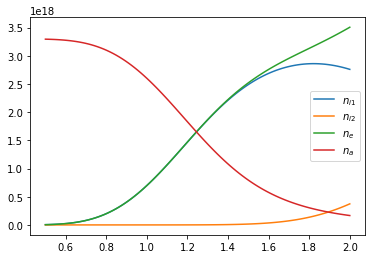

In [5]:
labels = ["$n_{i1}$", "$n_{i2}$", "$n_e$", "$n_a$"]
for i in range(4):
    plt.plot(Ts, sols[:, i], label=labels[i])
plt.legend()


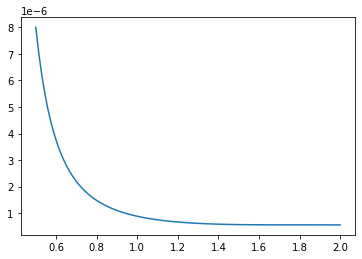

In [6]:
plt.plot(Ts, r)

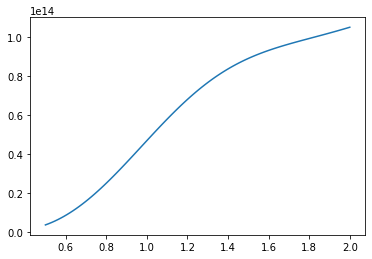

In [7]:
plt.plot(Ts, w)